In [59]:
import os
from skimage import io

# paths to data
path_closed = "./data/train/Closed_Eyes"
path_open = "./data/train/Open_Eyes"

# list of filenames
closed_eyes_files = os.listdir(path_closed)
open_eyes_files = os.listdir(path_open)

In [60]:
# images stored here
closed_eyes = []
open_eyes = []

# images loaded here
for file_name in closed_eyes_files:
    path = path_closed + "/" + file_name
    closed_eyes.append(io.imread(path))

for file_name in open_eyes_files:
    path = path_open + "/" + file_name
    open_eyes.append(io.imread(path))

# get sizes of the pictures in the array
closed_eyes_sizes = [image.shape[0] for image in closed_eyes]
open_eyes_sizes = [image.shape[0] for image in open_eyes]

In [61]:
import matplotlib.pyplot as plt

# plot sizes (pixels) of each photo
# all files are nxn
def plot_size(ax, arr, style, _label):
    ax.plot(arr, style, label = _label)
    ax.set_ylabel("size (n x n)")
    ax.set_xlabel("index")
    ax.legend()

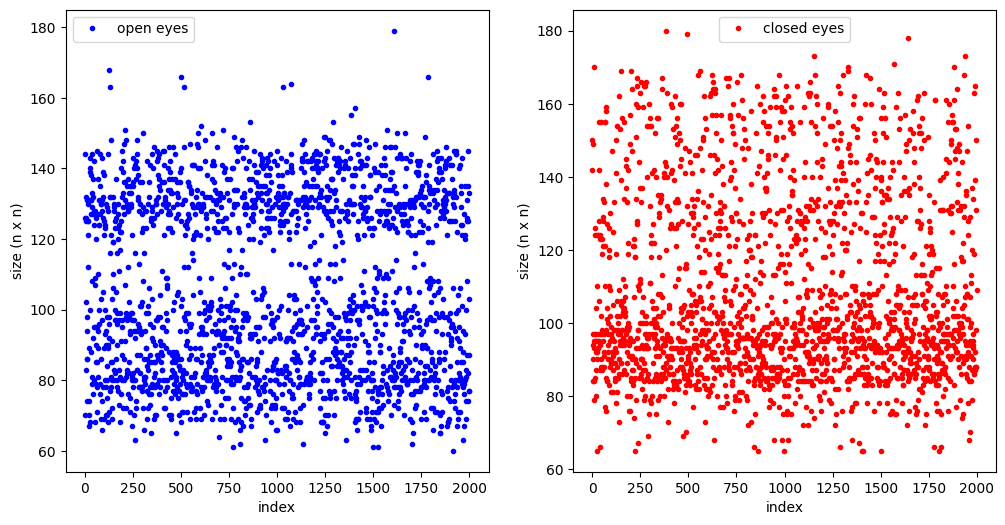

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_size(axes[0], open_eyes_sizes, 'b.', "open eyes")
plot_size(axes[1], closed_eyes_sizes, 'r.', "closed eyes")

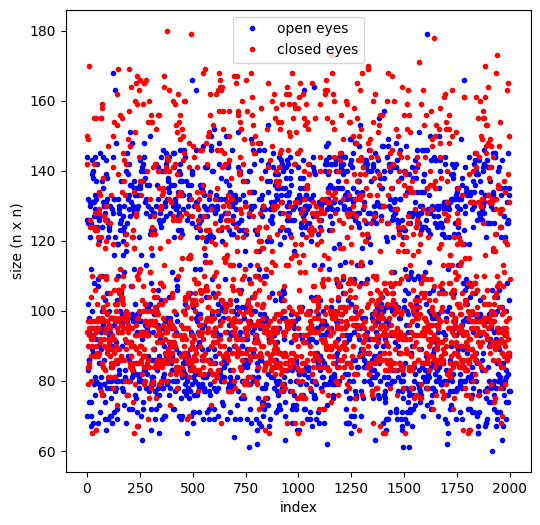

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

plot_size(axes, open_eyes_sizes, 'b.', "open eyes")
plot_size(axes, closed_eyes_sizes, 'r.', "closed eyes")
plt.show()
plt.close()

In [71]:
import numpy as np


n = 2000 # number of possible sizes
m = 2 # number of rows

# number of pictures with given size
# first row -> size of a picture 
# second row -> number of occurences
num_closed = np.zeros((n, m), dtype=int)
num_closed[:, 0] = np.arange(n)

num_open = np.zeros((n, m), dtype=int)
num_open[:, 0] = np.arange(n)

# count how many pictures of given size is
for i in range(n):
    num_closed[closed_eyes_sizes[i]][1] += 1
    num_open[open_eyes_sizes[i]][1] += 1

# prepare for displaying
cl_x = []
cl_y = []
o_x = []
o_y = []
for i in range(n):
    if(num_closed[i][1] != 0):
        cl_x.append(i)
        cl_y.append(num_closed[i][1])
    if (num_open[i][1] != 0):
        o_x.append(i)
        o_y.append(num_open[i][1])

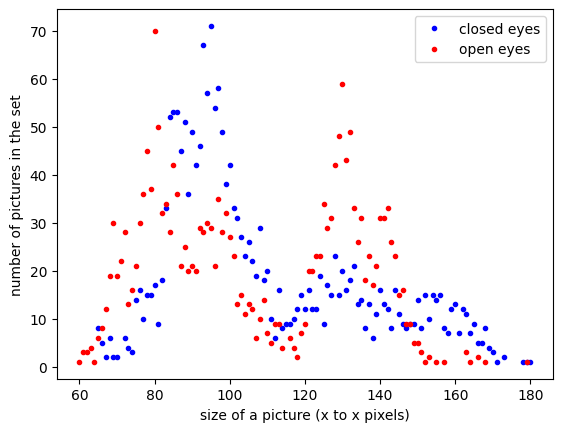

In [72]:
plt.plot(cl_x, cl_y, 'b.', label ="closed eyes")
plt.plot(o_x, o_y, 'r.', label="open eyes")
plt.xlabel("size of a picture (n x n pixels)")
plt.ylabel("number of pictures in the set")
plt.legend()
plt.show()